In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df['veil-type'].unique()

array(['p'], dtype=object)

In [5]:
df.drop('veil-type',axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   

In [7]:
for i  in df.columns:
    df[i]=le.fit_transform(df[i])

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [9]:
import matplotlib.pyplot as plt

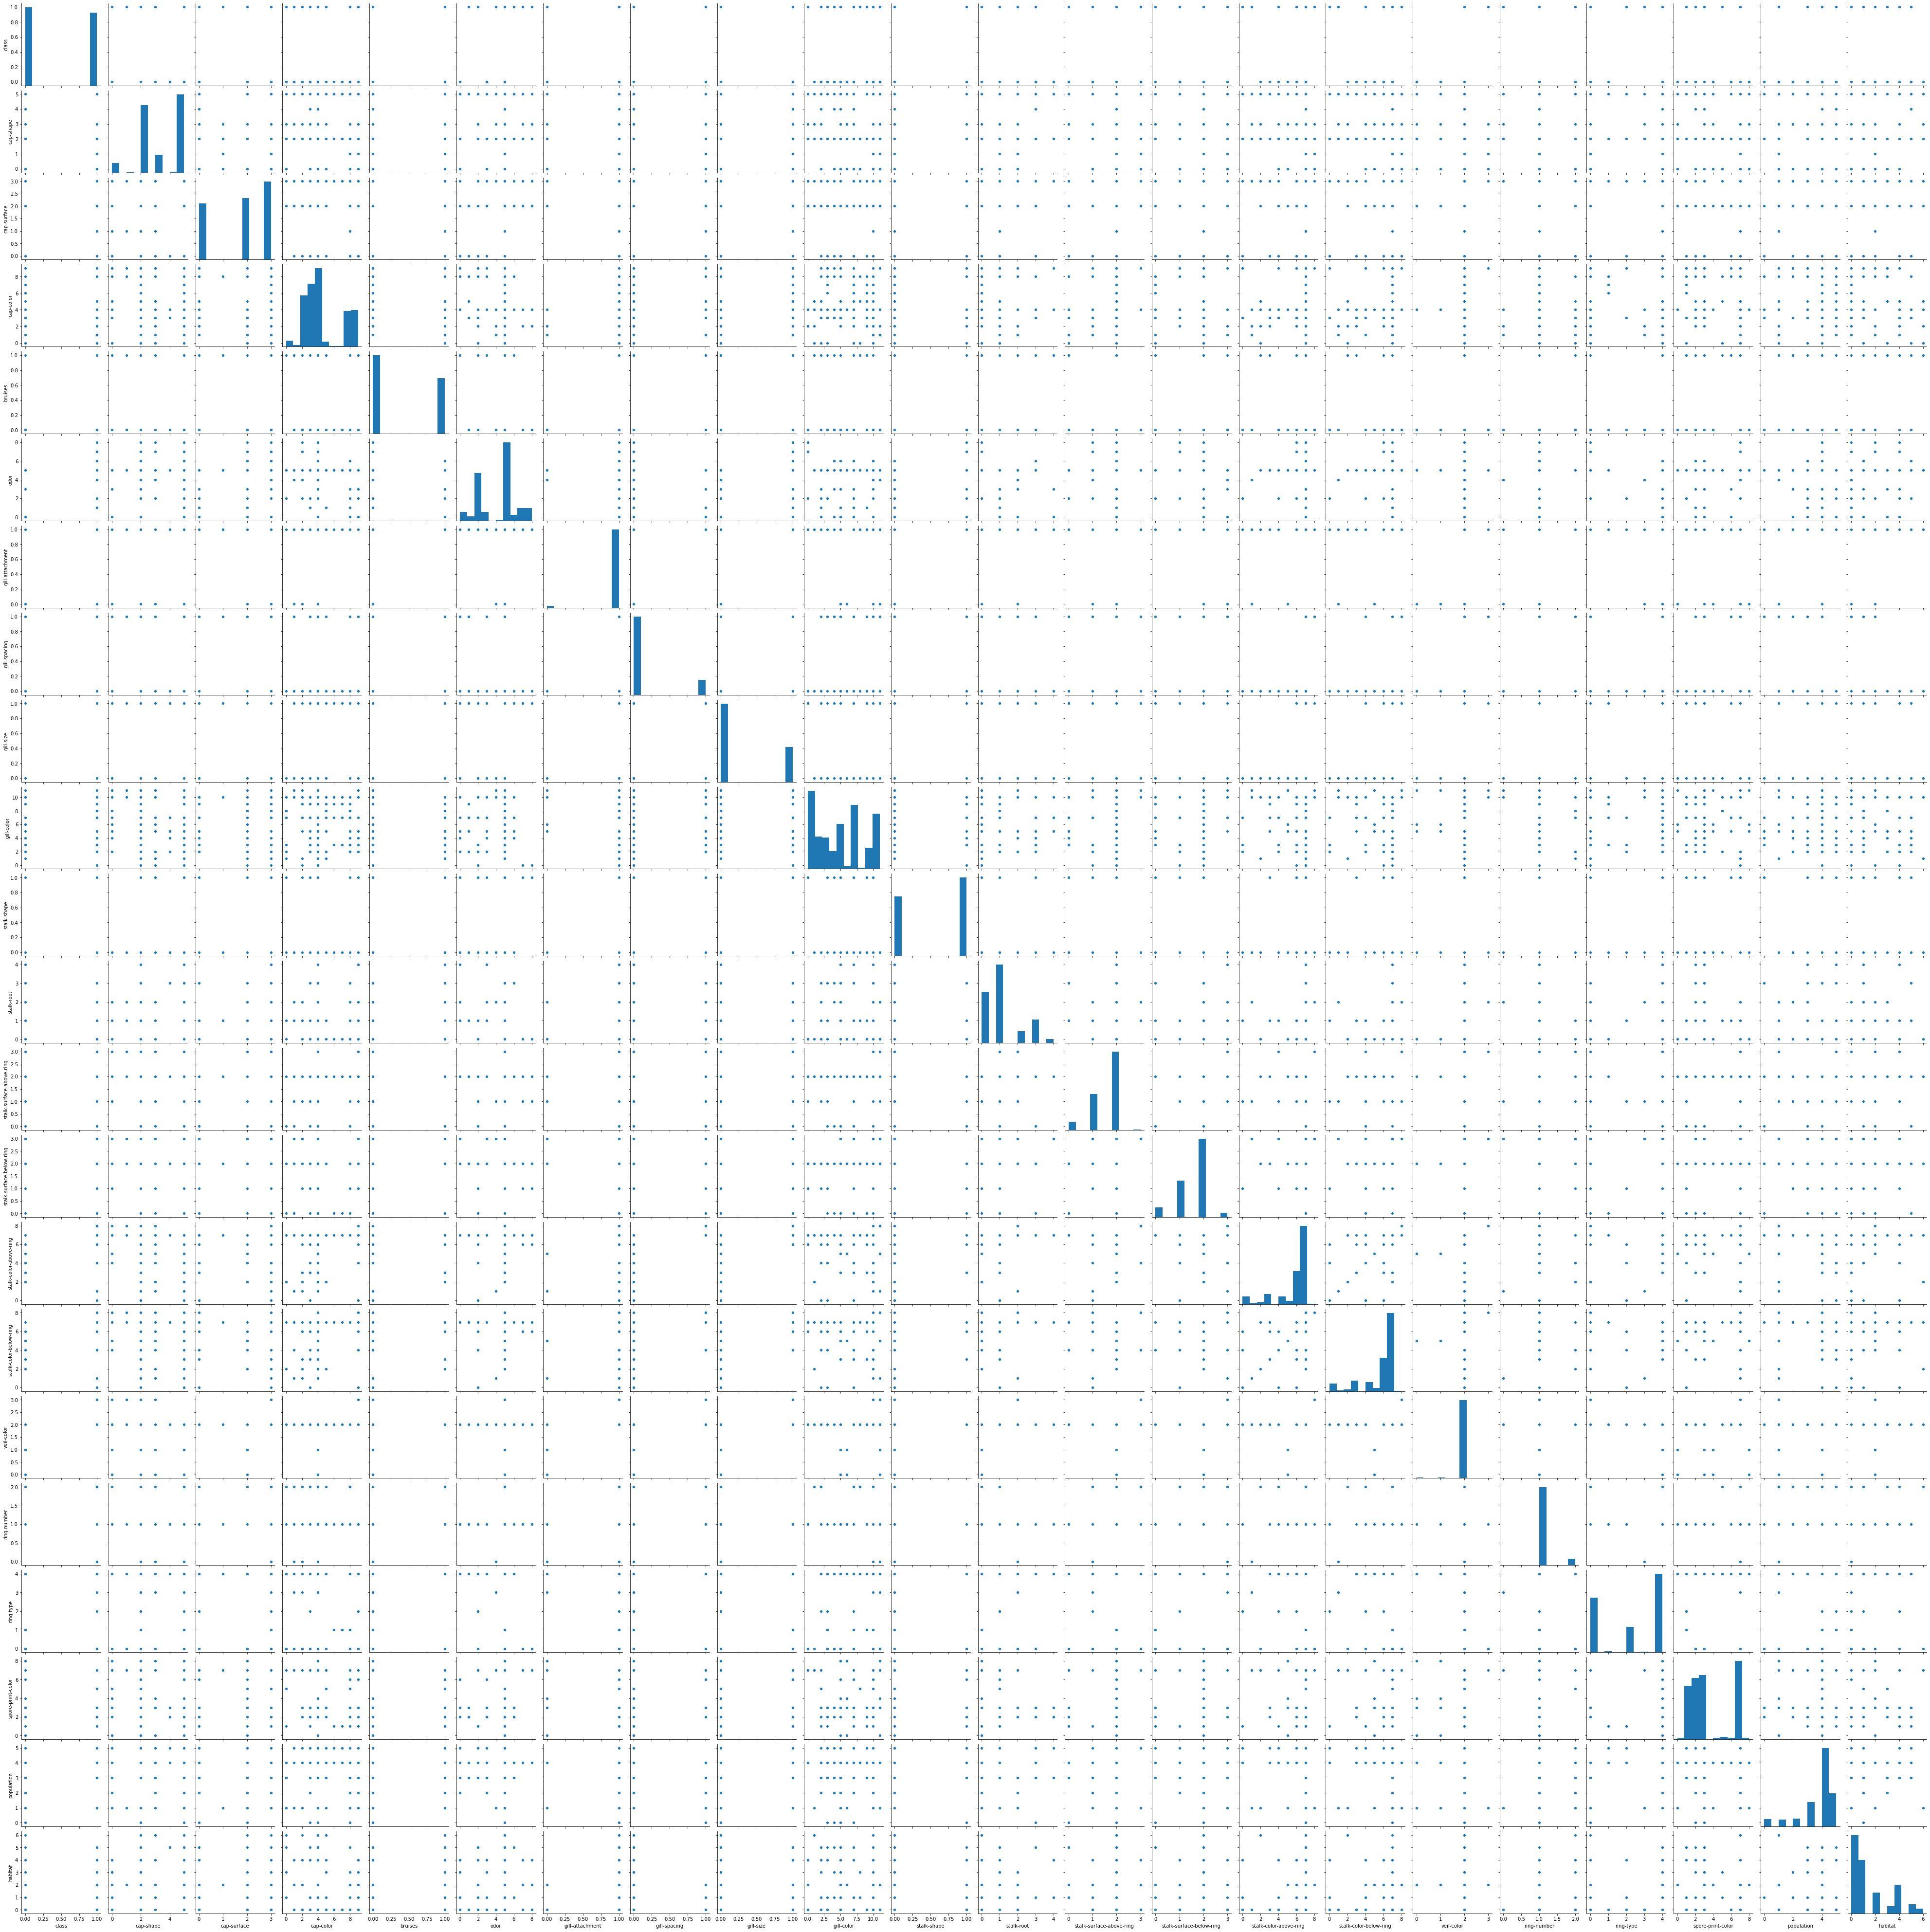

In [10]:
sns.pairplot(df)

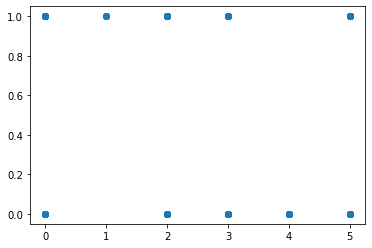

In [12]:
plt.scatter(df['cap-shape'],df['class'])

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [34]:
df_y=df['class']
df_x=df.iloc[:,1:]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33,random_state=43)

In [27]:
lg = LogisticRegression(max_iter=400)
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred),confusion_matrix)

0.9444237224916077 <function confusion_matrix at 0x0000022C3465DCA0>


In [28]:
y1=df['class']
x1=df.iloc[:,1:]

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [38]:
y=df_y

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33,random_state=43)

In [41]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))

0.9537486012681835


In [42]:
x1=x
y1=df_y

In [43]:
max_acc = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lg.fit(x1_train,y1_train)
    pred = lg.predict(x1_test)
    x=accuracy_score(y1_test,pred)
    if x>max_acc:
        max_acc = x
        random_state=i

In [44]:
print(max_acc,
random_state)

0.9670022371364653 88


In [45]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=88)
lg.fit(x1_train,y1_train)
y_pred = lg.predict(x1_test)
print(accuracy_score(y1_test,y_pred))

0.9670022371364653


In [46]:
from sklearn.metrics import mean_squared_error
print('RMSE is',np.sqrt(mean_squared_error(y1_test,y_pred)))

RMSE is 0.18165286362602345


In [48]:
import joblib
joblib.dump(lg,'mushrooms.pkl')

['mushrooms.pkl']